<a href="https://colab.research.google.com/github/DamodaraBarbosa/bank_customer_churn_prediction/blob/main/bank_customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

# 1. Load of dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle/Customer-Churn-Records.csv')

# Overview of data:

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# 2. About the data

From: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn/code?datasetId=3197960&sortBy=voteCount

> RowNumber—corresponds to the record (row) number and has no effect on the output.
>
>CustomerId—contains random values and has no effect on customer leaving the bank.
>
> Surname—the surname of a customer has no impact on their decision to leave the bank.
>
> CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
>
> Geography—a customer’s location can affect their decision to leave the bank.
>
> Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
>
> Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
>
> Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
>
> Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
>
> NumOfProducts—refers to the number of products that a customer has purchased through the bank.
>
> HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
>
> IsActiveMember—active customers are less likely to leave the bank.
>
> EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
>
> Exited—whether or not the customer left the bank.
>
> Complain—customer has complaint or not.
>
> Satisfaction Score—Score provided by the customer for their complaint resolution.
>
> Card Type—type of card hold by the customer.
>
> Points Earned—the points earned by the customer for using credit card.

# 3. Information about the dataframe

## 3.1. Dataframe's shape

In [4]:
df.shape

(10000, 18)

> The dataframe consists of 10000 rows and 18 columns.

## 3.2. Data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

> Analyzing the information, it is possible to state that there is no missing data.

## 3.3. Presence of duplicate data

In [6]:
df.loc[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned


> The presence of duplicate data in the dataframe is not detected.

# 4. Data processing

## 4.1. Drop of `RowNumber`, `CustomerId` and `Surname` columns

These columns are dropped as they do not contain data relevant to the

In [7]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis= 1)

# Overview of data after dropping columns:

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## 4.2. Rename of columns

In [8]:
columns_renamed = {
    'CreditScore': 'credit_score', 'Geography': 'geography', 'Gender': 'gender', 'Age': 'age', 'Tenure': 'tenure',
    'Balance': 'balance', 'NumOfProducts': 'num_of_products', 'HasCrCard': 'has_credit_card', 'IsActiveMember': 'is_active_member',
    'EstimatedSalary': 'estimated_salary', 'Exited': 'exited', 'Complain': 'complain', 'Satisfaction Score': 'satisfaction_score',
    'Card Type': 'card_type', 'Point Earned': 'point_earned'
}

In [9]:
df = df.rename(columns_renamed, axis= 1)

# Overview of dataframe with renamed columns:

df.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,exited,complain,satisfaction_score,card_type,point_earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# 5. Exploratory data analysis

## 5.1 Categorical variables

### 5.1.1. Gender

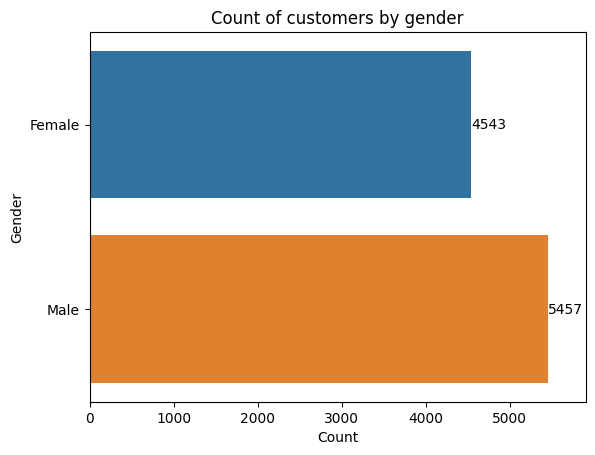

In [10]:
ax = sns.countplot(data= df, y= 'gender')
ax.set_title('Count of customers by gender')

# Set a label for each bar:

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge')

ax.set_ylabel('Gender')
ax.set_xlabel('Count')
ax.set_xlim([0, 5.9e3]) # set the limit of x-axis.
plt.show()

> There are more male than female customers in the dataset.

### 5.1.2. Geography

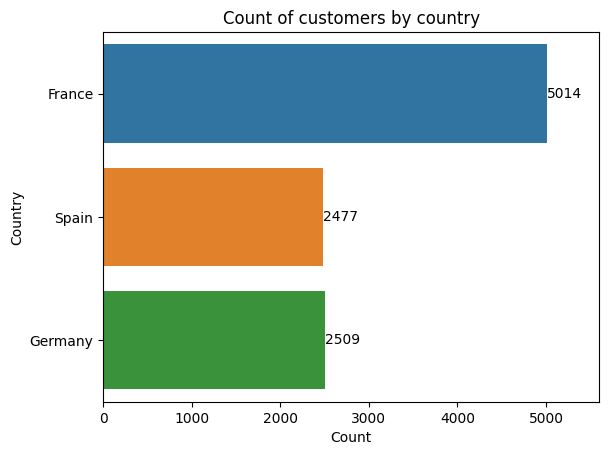

In [11]:
ax = sns.countplot(data= df, y= 'geography')
ax.set_title('Count of customers by country')

# Set a label for each bar:

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge')

ax.set_ylabel('Country')
ax.set_xlabel('Count')
ax.set_xlim([0, 5.6e3]) # set the limit of x-axis.
plt.show()

> There are customer data from three countries: France, Spain and Germany. The majority are from France.

### 5.1.3. Card type

In [12]:
df['card_type'].unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

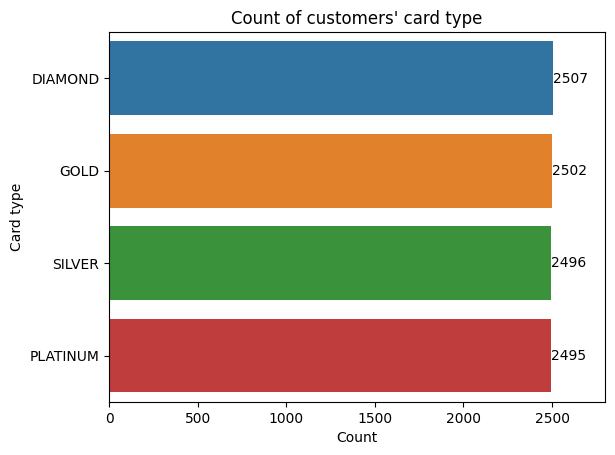

In [13]:
ax = sns.countplot(data= df, y= 'card_type')
ax.set_title("Count of customers' card type")

# Set a label for each bar:

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge')

ax.set_ylabel('Card type')
ax.set_xlabel('Count')
ax.set_xlim([0, 2.8e3]) # set the limit for x-axis.
plt.show()

> The distribution of card types is practically the same in the dataset.

### 5.1.4. Has credit card

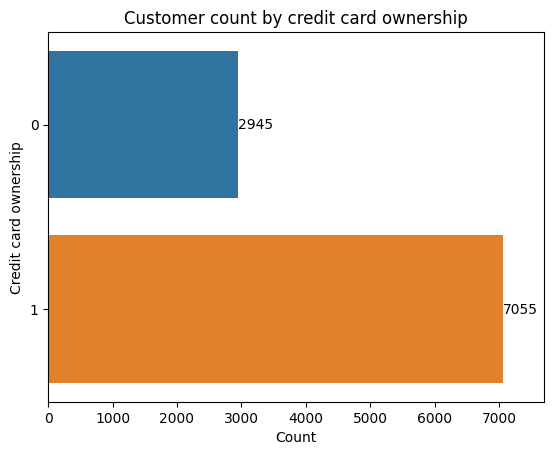

In [14]:
ax = sns.countplot(data= df, y= 'has_credit_card')
ax.set_title('Customer count by credit card ownership')

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge')

ax.set_xlabel('Count')
ax.set_ylabel('Credit card ownership')
ax.set_xlim([0, 7.7e3]) # set the limit for x-axis.
plt.show()

> Most of the bank's customers, around 70.5%, have a credit card.

### 5.1.5. Is active member

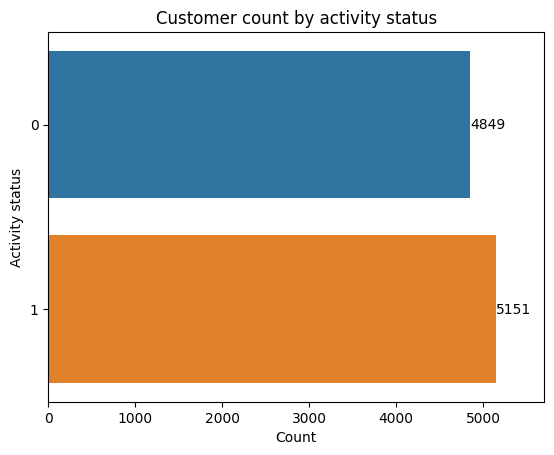

In [15]:
ax = sns.countplot(data= df, y= 'is_active_member')
ax.set_title('Customer count by activity status')

# Set a label for each bar:

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge')

ax.set_ylabel('Activity status')
ax.set_xlabel('Count')
ax.set_xlim([0, 5.7e3]) # set the limit for x-axis.
plt.show()

> Most of the bank's customers are active, but the difference is not so expressive.

### 5.1.6. Complain

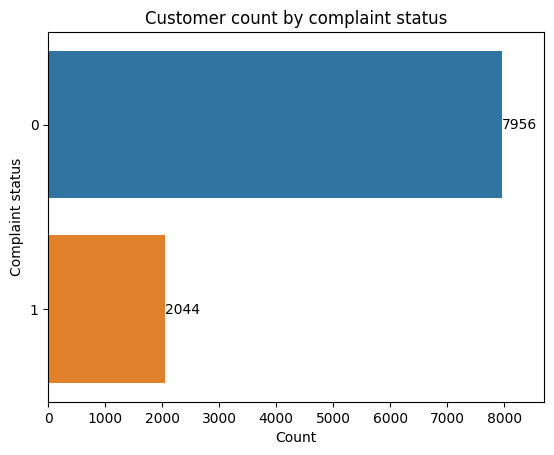

In [16]:
ax = sns.countplot(data= df, y= 'complain')
ax.set_title('Customer count by complaint status')

# Set a label for each bar:

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge')

ax.set_ylabel('Complaint status')
ax.set_xlabel('Count')
ax.set_xlim([0, 8.7e3]) # set the limit for x-axis.
plt.show()

> Only 2044 customers filed a complaint, this corresponds to 20.44% of customers.

## 5.2. Numeric variables

### 5.2.1. Frequency distribution of each numeric variable

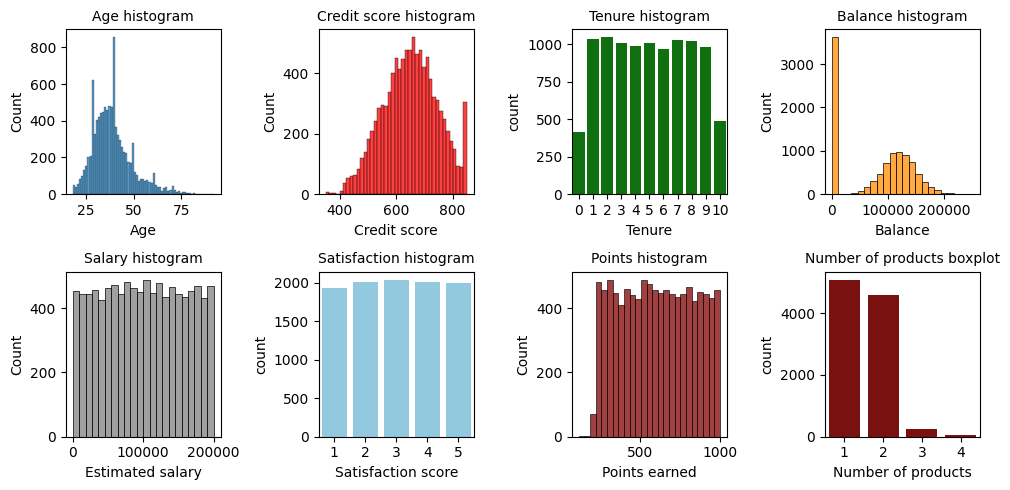

In [17]:
fig, ax = plt.subplots(2, 4, figsize= (10, 5))

ax1 = sns.histplot(data= df, x= 'age', ax= ax[0, 0])
ax1.set_title('Age histogram',fontsize= 10)
ax1.set_xlabel('Age')
ax2 = sns.histplot(data= df, x= 'credit_score', color= 'r', ax= ax[0, 1])
ax2.set_title('Credit score histogram',fontsize= 10)
ax2.set_xlabel('Credit score')
ax3 = sns.countplot(data= df, x= 'tenure', color= 'g', ax= ax[0, 2])
ax3.set_title('Tenure histogram',fontsize= 10)
ax3.set_xlabel('Tenure')
ax4 = sns.histplot(data= df, x= 'balance', color= 'darkorange', ax= ax[0, 3])
ax4.set_title('Balance histogram',fontsize= 10)
ax4.set_xlabel('Balance')
ax5 = sns.histplot(data= df, x= 'estimated_salary', color= 'gray', ax= ax[1, 0])
ax5.set_title('Salary histogram',fontsize= 10)
ax5.set_xlabel('Estimated salary')
ax6 = sns.countplot(data= df, x= 'satisfaction_score', color= 'skyblue', ax= ax[1, 1])
ax6.set_title('Satisfaction histogram',fontsize= 10)
ax6.set_xlabel('Satisfaction score')
ax7 = sns.histplot(data= df, x= 'point_earned', color= 'maroon', ax= ax[1, 2])
ax7.set_title('Points histogram',fontsize= 10)
ax7.set_xlabel('Points earned')
ax8 = sns.countplot(data= df, x= 'num_of_products', color= 'darkred', ax= ax[1, 3])
ax8.set_title('Number of products boxplot', fontsize= 10)
ax8.set_xlabel('Number of products')
plt.tight_layout()
plt.show()

### 5.2.2. Boxplot of each numeric variable

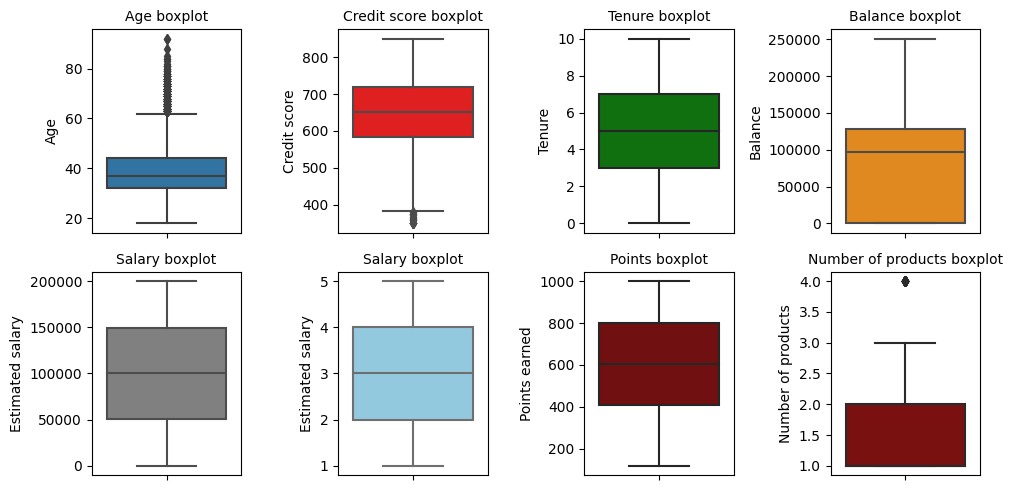

In [18]:
fig, ax = plt.subplots(2, 4, figsize= (10, 5))

ax1 = sns.boxplot(data= df, y= 'age', ax= ax[0, 0])
ax1.set_title('Age boxplot',fontsize= 10)
ax1.set_ylabel('Age')
ax2 = sns.boxplot(data= df, y= 'credit_score', color= 'r', ax= ax[0, 1])
ax2.set_title('Credit score boxplot',fontsize= 10)
ax2.set_ylabel('Credit score')
ax3 = sns.boxplot(data= df, y= 'tenure', color= 'g', ax= ax[0, 2])
ax3.set_title('Tenure boxplot',fontsize= 10)
ax3.set_ylabel('Tenure')
ax4 = sns.boxplot(data= df, y= 'balance', color= 'darkorange', ax= ax[0, 3])
ax4.set_title('Balance boxplot',fontsize= 10)
ax4.set_ylabel('Balance')
ax5 = sns.boxplot(data= df, y= 'estimated_salary', color= 'gray', ax= ax[1, 0])
ax5.set_title('Salary boxplot',fontsize= 10)
ax5.set_ylabel('Estimated salary')
ax6 = sns.boxplot(data= df, y= 'satisfaction_score', color= 'skyblue', ax= ax[1, 1])
ax6.set_title('Salary boxplot',fontsize= 10)
ax6.set_ylabel('Estimated salary')
ax7 = sns.boxplot(data= df, y= 'point_earned', color= 'maroon', ax= ax[1, 2])
ax7.set_title('Points boxplot',fontsize= 10)
ax7.set_ylabel('Points earned')
ax8 = sns.boxplot(data= df, y= 'num_of_products', color= 'darkred', ax= ax[1, 3])
ax8.set_title('Number of products boxplot', fontsize= 10)
ax8.set_ylabel('Number of products')
plt.tight_layout()
plt.show()

# 5.3. Analysis of the profile of customers who leave the bank

### 5.3.1 Exited

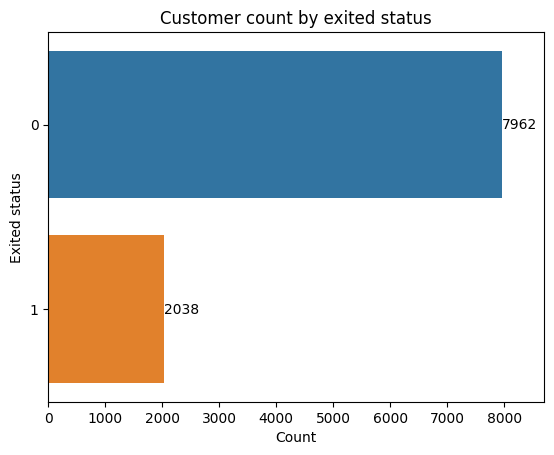

In [19]:
ax = sns.countplot(data= df, y= 'exited')
ax.set_title('Customer count by exited status')

# Set a label for each bar:

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge')

ax.set_ylabel('Exited status')
ax.set_xlabel('Count')
ax.set_xlim([0, 8.7e3]) # set the limit for x-axis.
plt.show()

> Customers who closed their bank accounts accounted for 20.38% of those in the dataset.

### Who closes more bank accounts, men or women?

In [20]:
# Exited customers data:

exited_customers = df.query('exited == 1')

# Exited customers dataframe overview:

exited_customers.head(3)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,exited,complain,satisfaction_score,card_type,point_earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484


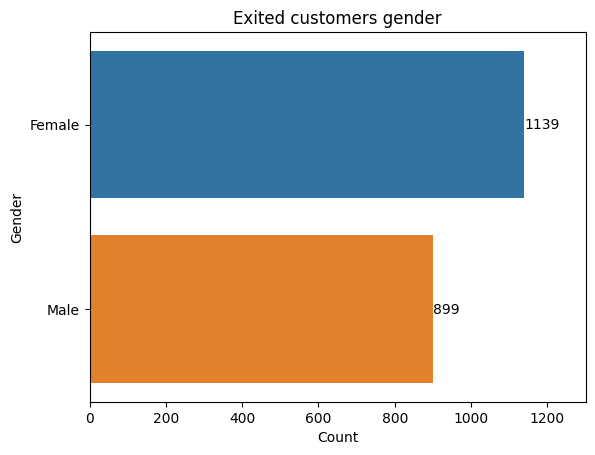

In [21]:
ax = sns.countplot(data= exited_customers, y= 'gender')
ax.set_title('Exited customers gender')

# Set a label for each bar:

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge')

ax.set_ylabel('Gender')
ax.set_xlabel('Count')
ax.set_xlim([0, 1.3e3]) # set the limit for x-axis.
plt.show()

> Although there are fewer female customers in the dataset, they are the majority among customers who close their bank account.

### What is the age range of customers who close their accounts?

In [22]:
df.groupby('exited')['age'].agg(['mean', 'median', 'std']).round(2)

,mean,median,std
exited,,,
0,37.41,36.0,10.13
1,44.84,45.0,9.76


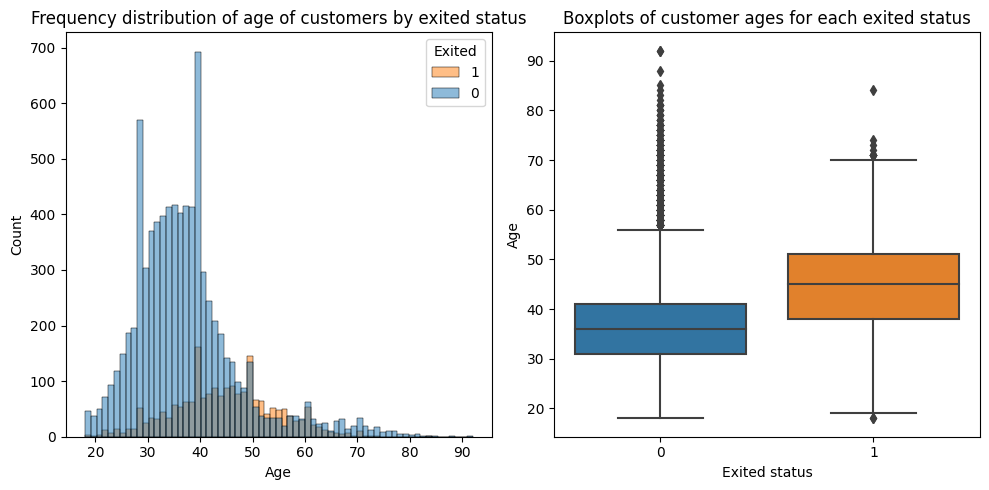

In [23]:
fig, ax = plt.subplots(1, 2, figsize= (10, 5))

ax1 = sns.histplot(data= df, x= 'age', hue= 'exited', ax= ax[0])
ax1.set_title('Frequency distribution of age of customers by exited status')
ax1.legend(title= 'Exited', labels= [1, 0])
ax1.set_xlabel('Age')
ax2 = sns.boxplot(data= df, y= 'age', x= 'exited', ax= ax[1])
ax2.set_title('Boxplots of customer ages for each exited status')
ax2.set_ylabel('Age')
ax2.set_xlabel('Exited status')
plt.tight_layout()
plt.show()

> It is possible to see that the age group of customers who close their accounts is more advanced, with an average of 45 years.

### Where are the customers who close their accounts?

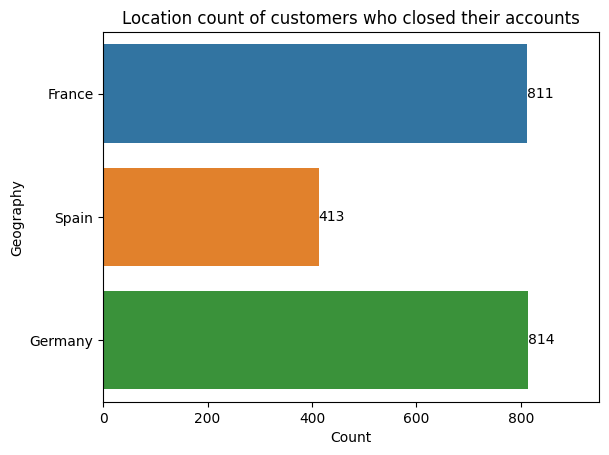

In [24]:
ax = sns.countplot(data= exited_customers, y= 'geography')
ax.set_title('Location count of customers who closed their accounts')

# Set a label for each bar:

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge')

ax.set_ylabel('Geography')
ax.set_xlabel('Count')
ax.set_xlim([0, 9.5e2]) # set the limit for x-axis.
plt.show()

> France and Germany are the main locations among the clients that close their accounts the most, although most of the clients in the dataset are from France.

### Are members who close accounts active?

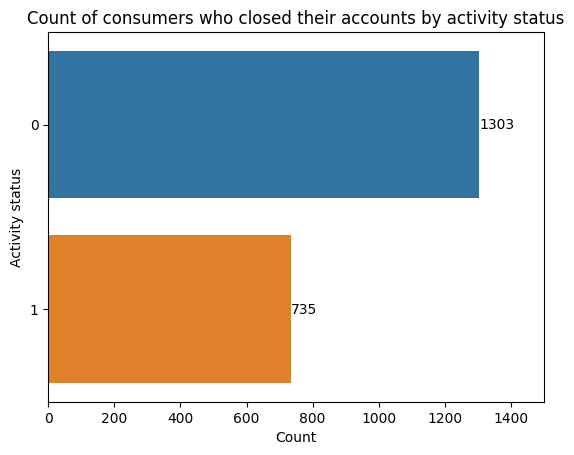

In [25]:
ax = sns.countplot(data= exited_customers, y= 'is_active_member')
ax.set_title('Count of consumers who closed their accounts by activity status')

# Set a label for each bar:

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge')

ax.set_ylabel('Activity status')
ax.set_xlabel('Count')
ax.set_xlim([0, 1.5e3]) # set the limit for x-axis.
plt.show()

> Although non-active users are those who close accounts the most, of consumers who close their accounts, active users account for 36.04%.

### What is the estimated salary of those who close their account?

In [26]:
df.groupby('exited')['estimated_salary'].agg(['mean', 'median', 'std']).round(2)

,mean,median,std
exited,,,
0,99726.85,99620.36,57399.96
1,101509.91,102489.34,57932.62


> The earnings of customers who closed their bank accounts appear to be different from customers who remain with bank accounts.

However, are the distributions of these two samples statistically different?

In [27]:
# Samples:

still_customer = df.query('exited == 0')['estimated_salary']
exited_customer = df.query('exited == 1')['estimated_salary']

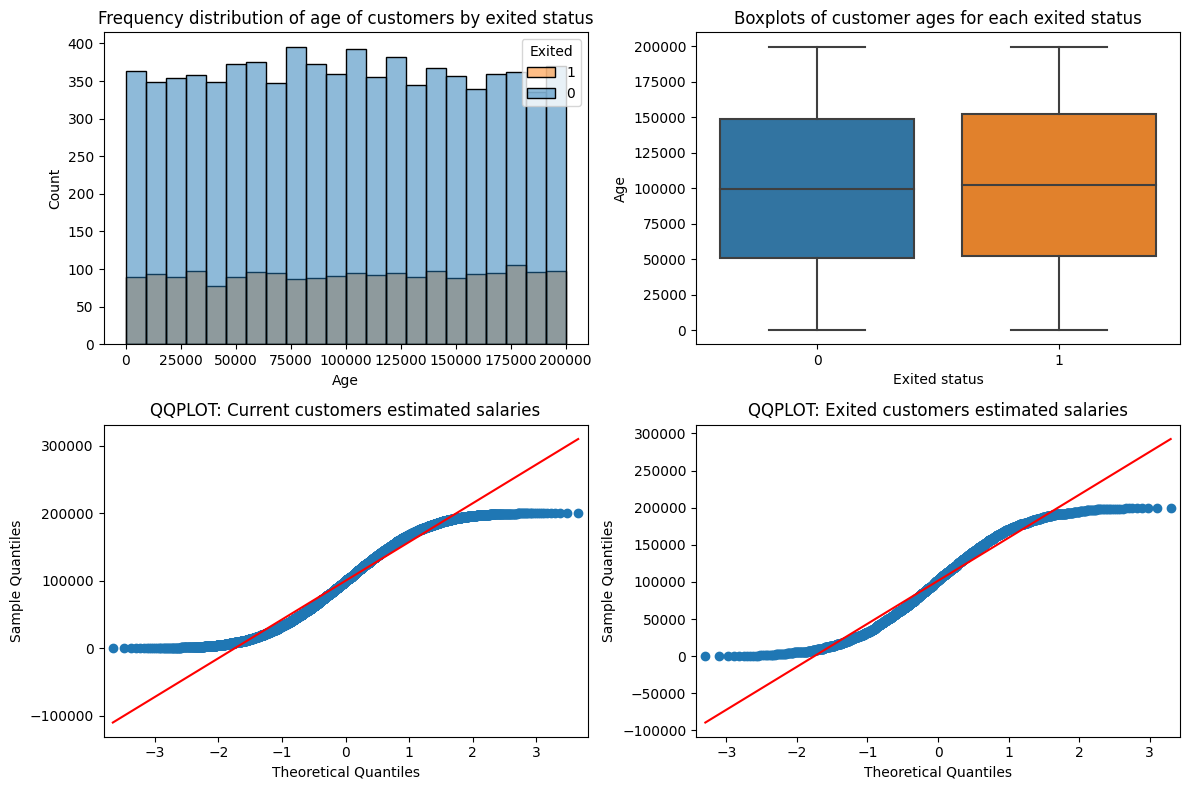

In [28]:
fig, ax = plt.subplots(2, 2, figsize= (12, 8))

ax1 = sns.histplot(data= df, x= 'estimated_salary', hue= 'exited', ax= ax[0, 0])
ax1.set_title('Frequency distribution of age of customers by exited status')
ax1.legend(title= 'Exited', labels= [1, 0])
ax1.set_xlabel('Age')
ax2 = sns.boxplot(data= df, y= 'estimated_salary', x= 'exited', ax= ax[0, 1])
ax2.set_title('Boxplots of customer ages for each exited status')
ax2.set_ylabel('Age')
ax2.set_xlabel('Exited status')
sm.qqplot(still_customer, line= 's', ax= ax[1, 0]) # qqplot of data from current customers salaries.
ax[1,0].set_title('QQPLOT: Current customers estimated salaries') # set the first qqplot's title.
sm.qqplot(exited_customer, line= 's', ax= ax[1, 1]) # qqplot of data from exited customers salaries.
ax[1, 1].set_title('QQPLOT: Exited customers estimated salaries') # set the second qqplot's title.
plt.tight_layout()
plt.show()

> Graphically, mainly through the histograms and QQplots, it is possible to notice that the data with the salary estimates of both samples **do not follow a normal distribution**.

Therefore, it is not appropriate to compare sample means, but their medians. In addition, it is appropriate to perform a non-parametric test, in this case the Mann-Whitney test, which compares the medians of the samples.

$Me_1 →$ Current customers estimated salaries median

$Me_2 →$ Exited customers estimated salaries median

> $H_0: Me_1 = Me_2$
>
> $H_1: Me_1 \neq Me_2$

In [29]:
stat, pvalue = mannwhitneyu(still_customer, exited_customer, alternative= 'two-sided')

In [30]:
print(f'Stat = {stat}')
print('='*30)
print(f'P-value = {pvalue}')

Stat = 7968250.0
P-value = 0.21235576456250627


$H_0$ hypothesis is rejected if $pvalue \leq α$.  Assuming that the significance level ($α$) is 5% (0.05):

In [31]:
pvalue <= 0.05

False

> There is no statistical evidence to reject the $H_0$ hypothesis. Therefore, the median salary of current customers and customers who have closed their accounts is assumed to be the same.

### Do complainers usually close their bank account?

In [32]:
complain_exited = pd.crosstab(df['complain'], df['exited'])

<Axes: xlabel='complain'>

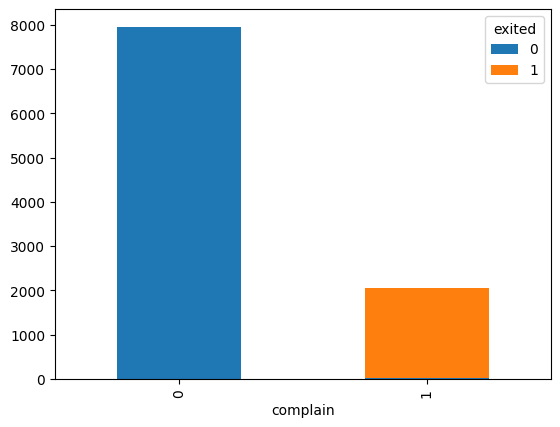

In [33]:
complain_exited.plot(kind= 'bar', stacked= True)

## 5.4. Correlation between the variables

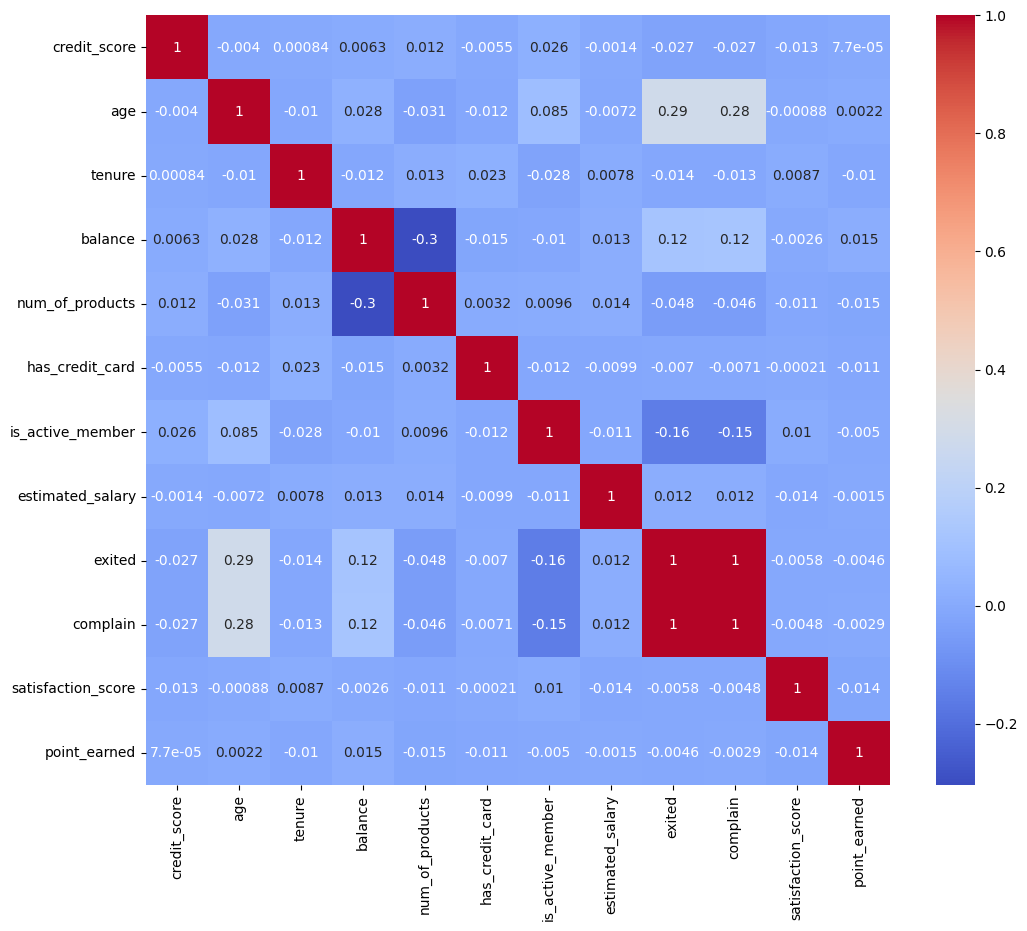

In [34]:
plt.figure(figsize= (12, 10))
sns.heatmap(data= df.corr(numeric_only=True), annot= True, cmap= 'coolwarm')
plt.show()

# 6. Classification model

The code cell below shows the sorting algorithms that will be used to predict the values:

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

## 6.1. Splitting data

In [36]:
# Data with independent variables:

X = df.drop('exited', axis= 1)

# Data from target variable:

y = df['exited']

In [37]:
# The data is separated by reserving 30% for the test dataset:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 0)

## 6.2. Categorical variables encoding

In [38]:
df.head(2)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,exited,complain,satisfaction_score,card_type,point_earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456


In [39]:
# Nominal categorical variables are instantiated in a list:

categorical_cols = ['geography',  'gender', 'card_type']

# And these column names are passed in the OneHotEncoder parameter:

encoder = OneHotEncoder(cols= categorical_cols)

In [40]:
# Encoding is performed on the X_train data:

X_train = encoder.fit_transform(X_train)

# And in the X_test data:

X_test = encoder.transform(X_test)

## 6.3. Data normalization

In [41]:
# from sklearn.preprocessing import RobustScaler

In [42]:
# sc = RobustScaler()

In [43]:
# X_train = sc.fit_transform(X_train)

In [44]:
# X_test = sc.transform(X_test)

## 6.4. Training models

The models with their hyperparameters, when these are defined, are contained in a dictionary that can be seen below:

In [45]:
models = {
    'Naive Bayes': {'model': GaussianNB()},
    'SVM': {'model': SVC(kernel= 'rbf', random_state= 0, C= 5, probability= True)},
    'Logistic Regression': {'model': LogisticRegression(max_iter= 200, penalty= 'l2', solver= 'lbfgs', tol= 0.0001, C= 1)},
    'KNN': {'model': KNeighborsClassifier(n_neighbors= 5, metric= 'minkowski', p= 1)},
    'Decision Tree': {'model': DecisionTreeClassifier(criterion= 'gini', random_state= 0, max_depth= 5)},
    'Random Forest': {'model': RandomForestClassifier(n_estimators= 100, criterion= 'gini', random_state= 0, max_depth= 5)},
    'XGBoost': {'model': XGBClassifier()},
    'LightGBM': {'model': LGBMClassifier(num_leaves= 31, objective= 'binary', max_depth= 5, learning_rate= 0.1, max_bin= 100)}
}

The function below iterates and trains the different models:

In [46]:
def train_model(X_train: pd.DataFrame, y_train: pd.Series, models: dict):
  """""""""
  X_train: independent variable data for model training.
  y_train: target variable data.
  models: dictionary with models.
  """""""""

  trained_models = {} # dictionary that will hold the trained models.

  for model_name, model_config in models.items():
      model = model_config['model']
      trained_model = model.fit(X_train, y_train)
      trained_models[model_name] = trained_model # the dictionary keys are the names of the respective models.

  return trained_models

In [47]:
# The models are then trained and instantiated on the variable:

trained_models = train_model(X_train, y_train, models)

In [48]:
trained_models

{'Naive Bayes': GaussianNB(),
 'SVM': SVC(C=5, probability=True, random_state=0),
 'Logistic Regression': LogisticRegression(C=1, max_iter=200),
 'KNN': KNeighborsClassifier(p=1),
 'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=0),
 'Random Forest': RandomForestClassifier(max_depth=5, random_state=0),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=1

## 6.5. Predicting values

In [49]:
def predict_values(X: pd.DataFrame, models: dict):
  """""""""
  X: data with independent variables, train data or test data.
  models: dictionary with trained models.
  """""""""
  predicted_values = dict()

  for model_name, trained_model in trained_models.items():
    y_predict = trained_model.predict(X)
    predicted_values[model_name] = y_predict # the predicted values ​​are stored in a dictionary where the keys are the model names.

  return predicted_values

In [50]:
# Values ​​are predicted, both from the X_test:

predicted_test_values = predict_values(X_test, trained_models)

# As well as the X_train>

predited_train_values = predict_values(X_train, trained_models)

## 6.6. Evaluate models

### 6.6.1. Scores

In [51]:
def scores_dataframe(y: pd.Series, predicted_y: dict):
  """""""""
  y: data with target variable, train data or test data.
  predicted_y: dictionary with predicted values for y from train data or test data.
  """""""""
  models_df = pd.DataFrame()

  for model_name, predict_y in predicted_y.items():
    model_accuracy = accuracy_score(y, predict_y)
    model_precision = precision_score(y, predict_y, zero_division= 0)
    model_recall = recall_score(y, predict_y, zero_division= 0)
    model_f1_score = f1_score(y, predict_y, zero_division= 0)

    model_scores_df = pd.DataFrame(
        {'Accuracy': model_accuracy, 'Precision': model_precision, 'Recall': model_recall, 'F1-Score': model_f1_score}, index= [model_name]
    ) # dataframe with scores for each model.

    models_df = pd.concat([model_scores_df, models_df]) # all dataframes are concated.

  return models_df

In [52]:
# A dataframe is created with the scores referring to the predicted values ​​from the test data:

models_test_scores = scores_dataframe(y_test, predicted_test_values)

# And another dataframe is instantiated with the scores referring to the predicted values ​​from the training data:

models_train_scores = scores_dataframe(y_train, predited_train_values)

* Scores of predicted values from y_test:

In [53]:
models_test_scores

,Accuracy,Precision,Recall,F1-Score
LightGBM,0.998667,0.996785,0.996785,0.996785
XGBoost,0.998667,0.996785,0.996785,0.996785
Random Forest,0.998667,0.996785,0.996785,0.996785
Decision Tree,0.998667,0.996785,0.996785,0.996785
KNN,0.758000,0.267857,0.096463,0.141844
Logistic Regression,0.819333,0.639860,0.294212,0.403084
SVM,0.792667,0.000000,0.000000,0.000000
Naive Bayes,0.788667,0.460526,0.112540,0.180879


* Scores of predicted values from y_train:

In [54]:
models_train_scores

,Accuracy,Precision,Recall,F1-Score
LightGBM,1.000000,1.000000,1.000000,1.000000
XGBoost,1.000000,1.000000,1.000000,1.000000
Random Forest,0.998571,0.994374,0.998588,0.996476
Decision Tree,0.999143,0.995781,1.000000,0.997886
KNN,0.820143,0.656687,0.232345,0.343245
Logistic Regression,0.827714,0.667197,0.295904,0.409980
SVM,0.797714,0.000000,0.000000,0.000000
Naive Bayes,0.799000,0.514469,0.112994,0.185292


### 6.6.2. Confusion matrix

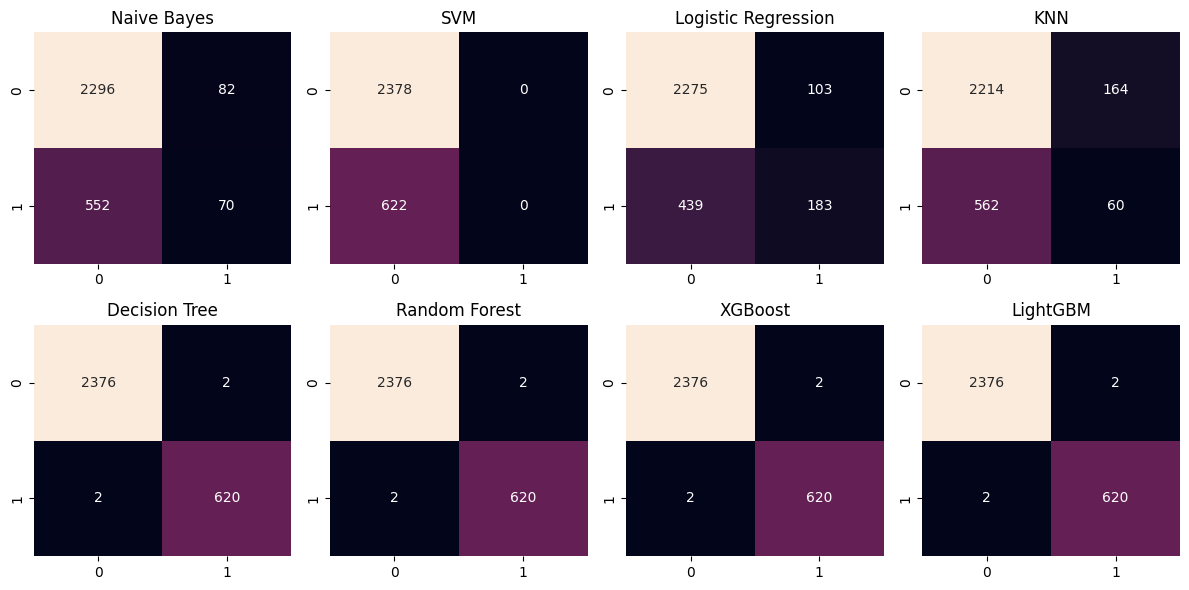

In [55]:
fig, ax = plt.subplots(2, 4, figsize= (12, 6))

ax1 = sns.heatmap(data= confusion_matrix(y_test, predicted_test_values['Naive Bayes']), annot= True, cbar= False, fmt= '.0f', ax= ax[0, 0])
ax1.set_title('Naive Bayes')
ax2 = sns.heatmap(data= confusion_matrix(y_test, predicted_test_values['SVM']), annot= True, cbar= False, fmt= '.0f', ax= ax[0, 1])
ax2.set_title('SVM')
ax3 = sns.heatmap(data= confusion_matrix(y_test, predicted_test_values['Logistic Regression']), annot= True, cbar= False, fmt= '.0f', ax= ax[0, 2])
ax3.set_title('Logistic Regression')
ax4 = sns.heatmap(data= confusion_matrix(y_test, predicted_test_values['KNN']), annot= True, cbar= False, fmt= '.0f', ax= ax[0, 3])
ax4.set_title('KNN')
ax5 = sns.heatmap(data= confusion_matrix(y_test, predicted_test_values['Decision Tree']), annot= True, cbar= False, fmt= '.0f', ax= ax[1, 0])
ax5.set_title('Decision Tree')
ax6 = sns.heatmap(data= confusion_matrix(y_test, predicted_test_values['Random Forest']), annot= True, cbar= False, fmt= '.0f', ax= ax[1, 1])
ax6.set_title('Random Forest')
ax7 = sns.heatmap(data= confusion_matrix(y_test, predicted_test_values['XGBoost']), annot= True, cbar= False, fmt= '.0f', ax= ax[1, 2])
ax7.set_title('XGBoost')
ax8 = sns.heatmap(data= confusion_matrix(y_test, predicted_test_values['LightGBM']), annot= True, cbar= False, fmt= '.0f', ax= ax[1, 3])
ax8.set_title('LightGBM')
plt.tight_layout()
plt.show()

### 6.6.3. ROC Curve

In [56]:
def roc_curves_scores(models: dict):
  curves_metrics = dict()

  for model_name, trained_model in models.items():
    y_pred_proba = trained_model.predict_proba(X_test)[::, 1]
    fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    curves_metrics[model_name] = dict()

    curves_metrics[model_name]['fpr'] = fpr
    curves_metrics[model_name]['tpr'] = tpr
    curves_metrics[model_name]['threshold'] = threshold
    curves_metrics[model_name]['roc_auc'] = roc_auc

  return curves_metrics

In [57]:
dict_roc_curves = roc_curves_scores(trained_models)

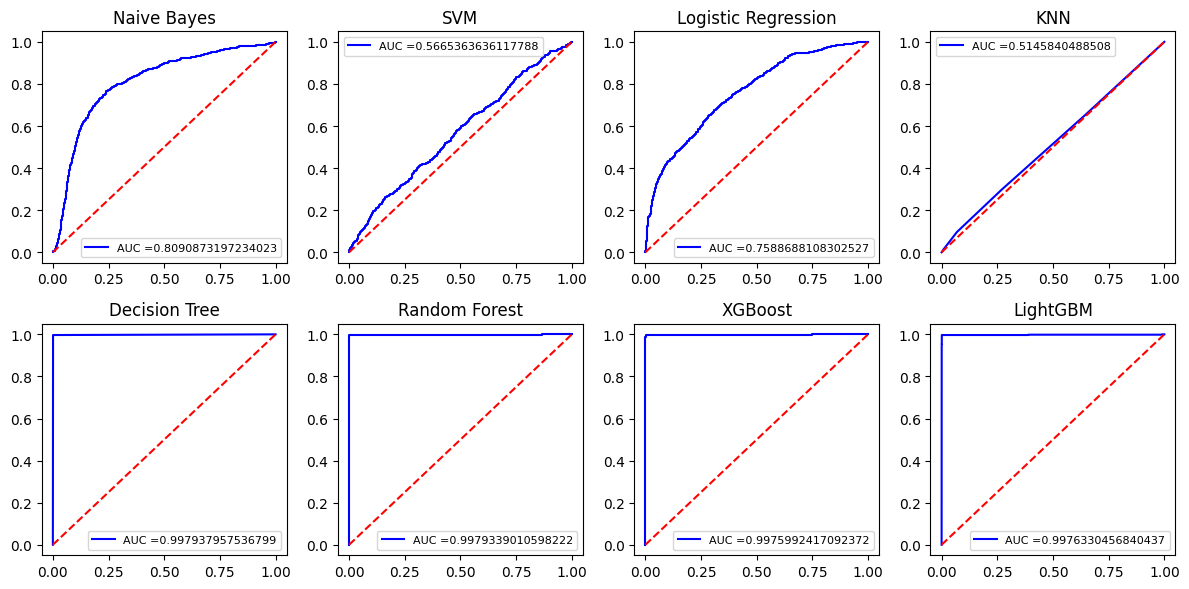

In [75]:
fig, ax = plt.subplots(2, 4, figsize= (12, 6))

# ROC CURVE for Naive Bayes:

ax[0, 0].plot(
    dict_roc_curves['Naive Bayes']['fpr'],
    dict_roc_curves['Naive Bayes']['tpr'],
    'b', label = 'AUC =' + str(dict_roc_curves['Naive Bayes']['roc_auc'])
)
ax[0, 0].set_title('Naive Bayes')
ax[0, 0].legend(fontsize= 8)
ax[0, 0].plot([0, 1], [0, 1], 'r--')
plt.tight_layout()

# ROC CURVE for SVM:

ax[0, 1].plot(
    dict_roc_curves['SVM']['fpr'],
    dict_roc_curves['SVM']['tpr'],
    'b', label = 'AUC =' + str(dict_roc_curves['SVM']['roc_auc'])
)
ax[0, 1].set_title('SVM')
ax[0, 1].legend(fontsize= 8)
ax[0, 1].plot([0, 1], [0, 1], 'r--')
plt.tight_layout()

# ROC CURVE for Logistic Regression:

ax[0, 2].plot(
    dict_roc_curves['Logistic Regression']['fpr'],
    dict_roc_curves['Logistic Regression']['tpr'],
    'b', label = 'AUC =' + str(dict_roc_curves['Logistic Regression']['roc_auc'])
)
ax[0, 2].set_title('Logistic Regression')
ax[0, 2].legend(fontsize= 8)
ax[0, 2].plot([0, 1], [0, 1], 'r--')

# ROC CURVE for KNN:

ax[0, 3].plot(
    dict_roc_curves['KNN']['fpr'],
    dict_roc_curves['KNN']['tpr'],
    'b', label = 'AUC =' + str(dict_roc_curves['KNN']['roc_auc'])
)
ax[0, 3].set_title('KNN')
ax[0, 3].legend(fontsize= 8)
ax[0, 3].plot([0, 1], [0, 1], 'r--')

# ROC CURVE for Decision Tree:

ax[1, 0].plot(
    dict_roc_curves['Decision Tree']['fpr'],
    dict_roc_curves['Decision Tree']['tpr'],
    'b', label = 'AUC =' + str(dict_roc_curves['Decision Tree']['roc_auc'])
)
ax[1, 0].set_title('Decision Tree')
ax[1, 0].legend(fontsize= 8)
ax[1, 0].plot([0, 1], [0, 1], 'r--')

# ROC CURVE for Random Forest:

ax[1, 1].plot(
    dict_roc_curves['Random Forest']['fpr'],
    dict_roc_curves['Random Forest']['tpr'],
    'b', label = 'AUC =' + str(dict_roc_curves['Random Forest']['roc_auc'])
)
ax[1, 1].set_title('Random Forest')
ax[1, 1].legend(fontsize= 8)
ax[1, 1].plot([0, 1], [0, 1], 'r--')

# ROC CURVE for XGBoost:

ax[1, 2].plot(
    dict_roc_curves['XGBoost']['fpr'],
    dict_roc_curves['XGBoost']['tpr'],
    'b', label = 'AUC =' + str(dict_roc_curves['XGBoost']['roc_auc'])
)
ax[1, 2].set_title('XGBoost')
ax[1, 2].legend(fontsize= 8)
ax[1, 2].plot([0, 1], [0, 1], 'r--')

# ROC CURVE for LightGBM:

ax[1, 3].plot(
    dict_roc_curves['LightGBM']['fpr'],
    dict_roc_curves['LightGBM']['tpr'],
    'b', label = 'AUC =' + str(dict_roc_curves['LightGBM']['roc_auc'])
)
ax[1, 3].set_title('LightGBM')
ax[1, 3].legend(fontsize= 8)
ax[1, 3].plot([0, 1], [0, 1], 'r--')

plt.tight_layout()
plt.show()